# Hierarchical Clustering
This notebook shows simple examples of hierarchical clustering and the elbow/knee analysis used to select the most adequate number of clusters.

The notebook is an adaptation of 

https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

We start by importing the required libraries.

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# we are using the scipy implementation
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

%matplotlib inline

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation
linkage_type = 'single'

## Image Data
First we load a dataset containing information about a set of data.

In [2]:
df = pd.read_csv('Images.csv',index_col=0);

df.describe()

,mean_r,mean_g,mean_b,median_r,median_g,median_b,rms_r,rms_g,rms_b,var_r,var_g,var_b,stddev_r,stddev_g,stddev_b
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,106.900882,110.972706,91.119206,100.053476,105.941176,87.748663,125.802296,125.464058,106.666347,4250.364199,3164.202783,2825.313092,63.478897,54.997912,50.027205
std,42.260275,40.542504,57.260451,55.111786,50.677472,70.035904,40.460845,37.151040,55.024812,1943.955770,1305.297354,1938.772937,14.899025,11.839850,18.009060
min,24.056340,30.406251,5.037643,2.000000,19.000000,2.000000,34.370502,42.521996,13.617163,602.623923,77.796471,77.889461,24.548400,8.820231,8.825501
25%,75.027593,79.798670,44.728386,56.500000,64.500000,27.500000,94.793973,97.405487,60.193714,2786.761227,2289.608789,1359.163141,52.789761,47.849854,36.866359
50%,101.723229,102.845741,77.003341,88.000000,95.000000,63.000000,119.739737,117.754621,95.631478,4004.478878,3010.020770,2387.616090,63.280952,54.863656,48.863239
75%,139.754682,145.080377,139.595973,143.000000,145.000000,150.500000,159.824221,156.376795,157.474001,5440.284502,3902.825137,3919.576206,73.758218,62.472593,62.606164
max,219.127781,208.529278,219.779796,253.000000,222.000000,230.000000,226.984948,211.797508,222.360909,10252.382672,8580.256712,9944.418535,101.254050,92.629675,99.721705


In [3]:
df.head()

,label,filename,mean_r,mean_g,mean_b,median_r,median_g,median_b,rms_r,rms_g,rms_b,var_r,var_g,var_b,stddev_r,stddev_g,stddev_b
0,beach,0.jpeg,100.004495,136.897848,164.744087,76.0,133.0,179.0,116.291693,142.550265,171.622841,3522.858785,1579.557452,2313.785393,59.353675,39.743647,48.101823
1,beach,1.jpg,142.325658,179.794887,193.732737,131.0,180.0,218.0,168.660417,187.648033,202.191663,8189.743419,2885.582819,3349.095075,90.497201,53.717621,57.871367
2,beach,10.jpg,98.512676,138.150859,154.165230,87.0,148.0,173.0,122.399183,146.126198,165.525062,5276.812691,2267.205802,3631.628112,72.641673,47.615185,60.262991
3,beach,11.jpg,148.226686,189.030772,189.800636,161.0,215.0,217.0,163.695760,197.704634,202.492859,4825.151406,3354.489519,4979.076655,69.463310,57.917955,70.562573
4,beach,12.jpg,101.723229,124.142103,143.421260,99.0,130.0,161.0,122.897211,133.064507,157.585841,4756.109181,2294.901424,4263.639268,68.964550,47.905129,65.296549


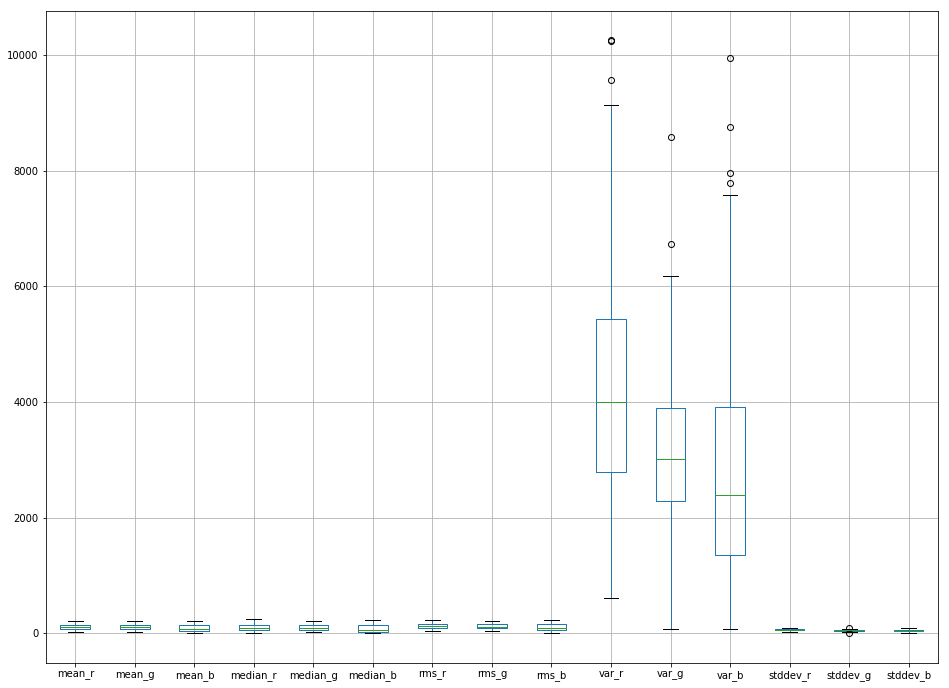

In [4]:
plt.figure(figsize=(16,12));
df.boxplot();

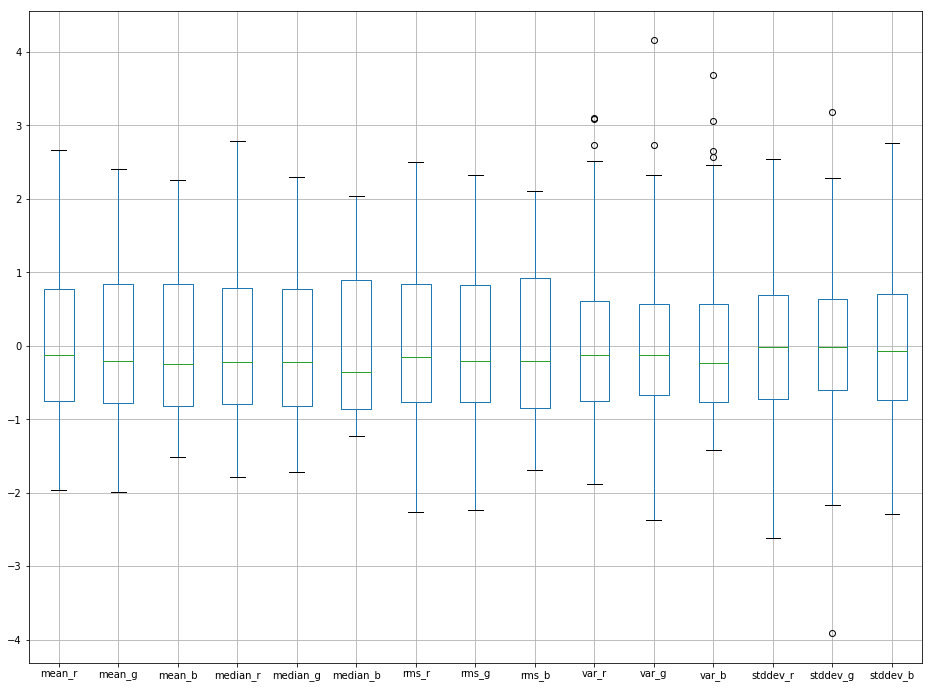

In [5]:
zs = df.copy(deep=True)
for c in zs.columns:
    if (c!='label' and c!='filename'):
        zs[c] = (zs[c]-np.mean(zs[c]))/np.std(zs[c])
        
plt.figure(figsize=(16,12));
zs.boxplot();

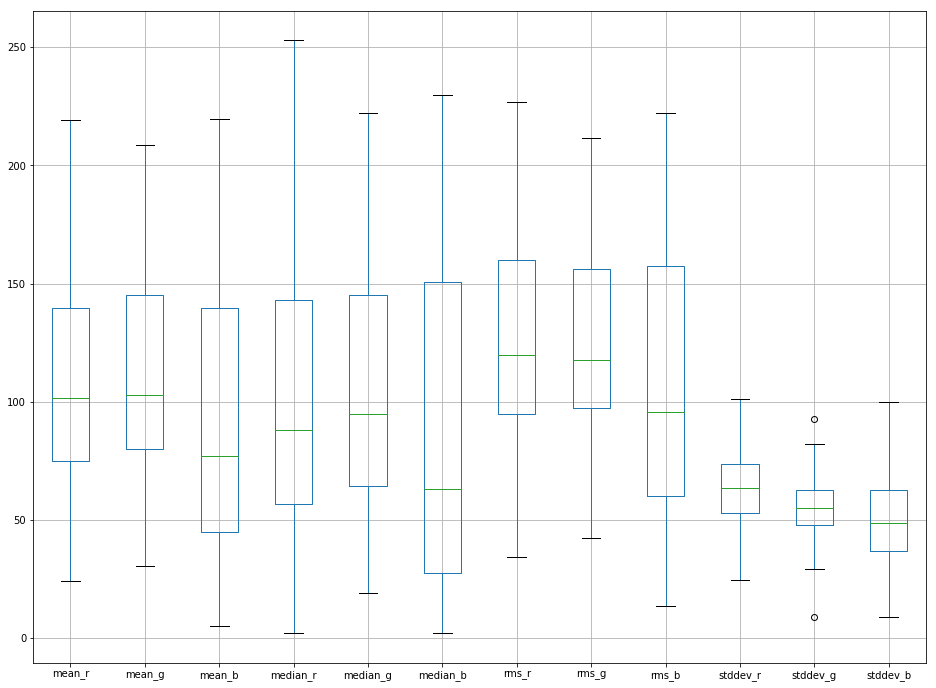

In [6]:
df = df.drop(['var_r','var_g','var_b'],axis=1)
plt.figure(figsize=(16,12));
df.boxplot();

Let's apply hierarchical clustering

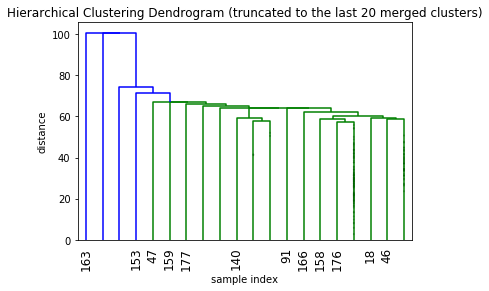

In [7]:
x = df[['mean_r', 'mean_g', 'mean_b', 'median_r','median_g', 'median_b', 'rms_r', 'rms_g', 'rms_b', 'stddev_r','stddev_g', 'stddev_b']].values
z = linkage(x, linkage_type)

plt.title('Hierarchical Clustering Dendrogram (truncated to the last 20 merged clusters)')
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [8]:
wss_values = []
bss_values = []
k_values = range(1,50)

for k in k_values:
    clustering = fcluster(z, k, criterion='maxclust')
    centroids = [np.mean(x[clustering==c],axis=0) for c in range(1,k+1)]
    cdist(x, centroids, 'euclidean')
    D = cdist(x, centroids, 'euclidean')
    cIdx = np.argmin(D,axis=1)
    d = np.min(D,axis=1)

    avgWithinSS = sum(d)/x.shape[0]

    # Total with-in sum of square
    wss = sum(d**2)

    tss = sum(pdist(x)**2)/x.shape[0]
    
    bss = tss-wss
    
    wss_values += [wss]
    bss_values += [bss]

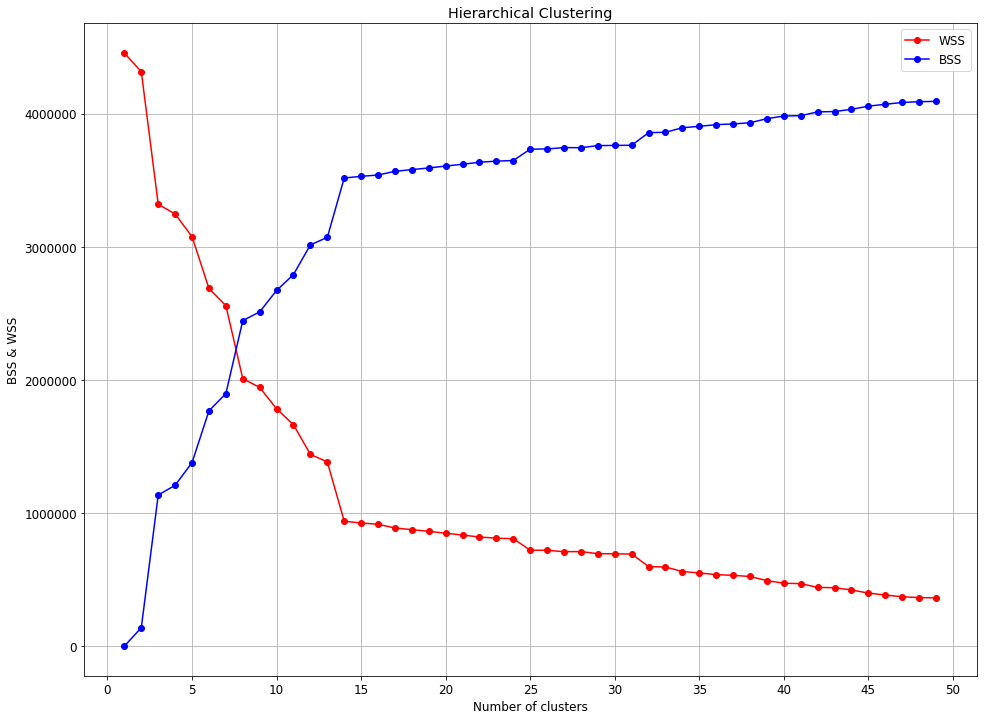

In [11]:
# fig = plt.figure()
fig = plt.figure(figsize=(16,12));
font = {'family' : 'sans', 'size'   : 12}
plt.rc('font', **font)
plt.plot(k_values, wss_values, 'bo-', color='red', label='WSS')
plt.plot(k_values, bss_values, 'bo-', color='blue', label='BSS')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('BSS & WSS')
plt.xticks(np.arange(0,51,5))
plt.legend()
plt.title('Hierarchical Clustering');

Let's do the same for the normalized data.

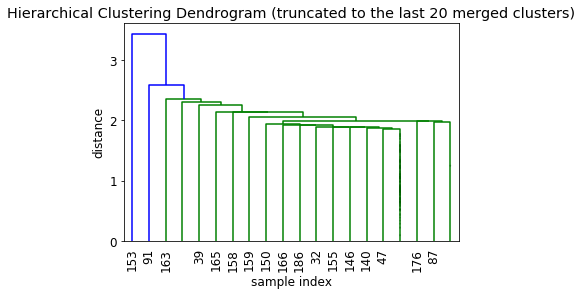

In [12]:
x = zs[['mean_r', 'mean_g', 'mean_b', 'median_r','median_g', 'median_b', 'rms_r', 'rms_g', 'rms_b', 'stddev_r','stddev_g', 'stddev_b']].values
z = linkage(x, linkage_type)

plt.title('Hierarchical Clustering Dendrogram (truncated to the last 20 merged clusters)')
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

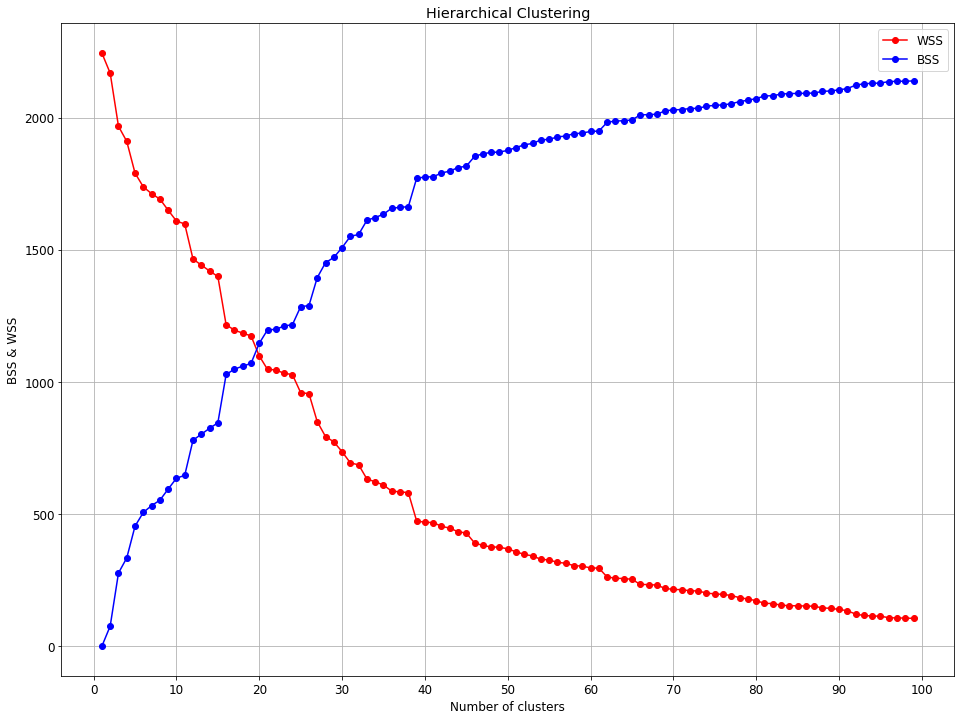

In [13]:
wss_values = []
bss_values = []
k_values = range(1,100)

for k in k_values:
    clustering = fcluster(z, k, criterion='maxclust')
    centroids = [np.mean(x[clustering==c],axis=0) for c in range(1,k+1)]
    cdist(x, centroids, 'euclidean')
    D = cdist(x, centroids, 'euclidean')
    cIdx = np.argmin(D,axis=1)
    d = np.min(D,axis=1)

    avgWithinSS = sum(d)/x.shape[0]

    # Total with-in sum of square
    wss = sum(d**2)

    tss = sum(pdist(x)**2)/x.shape[0]
    
    bss = tss-wss
    
    wss_values += [wss]
    bss_values += [bss]

fig = plt.figure(figsize=(16,12));
font = {'family' : 'sans', 'size'   : 12}
plt.rc('font', **font)
plt.plot(k_values, wss_values, 'bo-', color='red', label='WSS')
plt.plot(k_values, bss_values, 'bo-', color='blue', label='BSS')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('BSS & WSS')
plt.xticks(np.arange(0,101,10))
plt.legend()
plt.title('Hierarchical Clustering');

Let's apply k-means.

In [14]:
def KneeElbowAnalysis(x,max_k=20):
    k_values = range(1,max_k)
    clusterings = [KMeans(n_clusters=k, random_state=random_state).fit(x) for k in k_values]
    centroids = [clustering.cluster_centers_ for clustering in clusterings]

    D_k = [cdist(x, cent, 'euclidean') for cent in centroids]
    cIdx = [np.argmin(D,axis=1) for D in D_k]
    dist = [np.min(D,axis=1) for D in D_k]
    avgWithinSS = [sum(d)/x.shape[0] for d in dist]

    # Total with-in sum of square
    wcss = [sum(d**2) for d in dist]

    tss = sum(pdist(x)**2)/x.shape[0]
    bss = tss-wcss

    kIdx = 10-1
    
    #
    # elbow curve
    #
    fig = plt.figure(figsize=(12,9));
    font = {'family' : 'sans', 'size'   : 12}
    plt.rc('font', **font)
    plt.plot(k_values, wcss, 'bo-', color='red', label='WCSS')
    plt.plot(k_values, bss, 'bo-', color='blue', label='BCSS')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.legend()
    plt.title('KMeans Clustering');

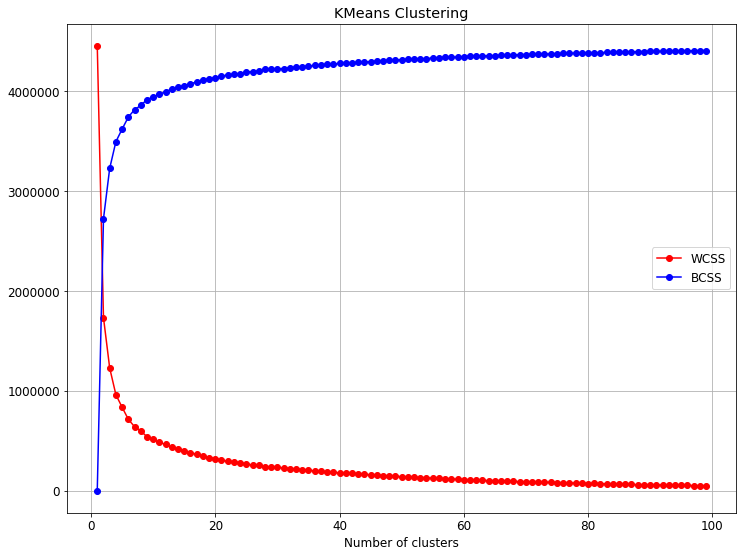

In [15]:
random_state = 1234
x = df[['mean_r', 'mean_g', 'mean_b', 'median_r','median_g', 'median_b', 'rms_r', 'rms_g', 'rms_b', 'stddev_r','stddev_g', 'stddev_b']].values
KneeElbowAnalysis(x,max_k=100)

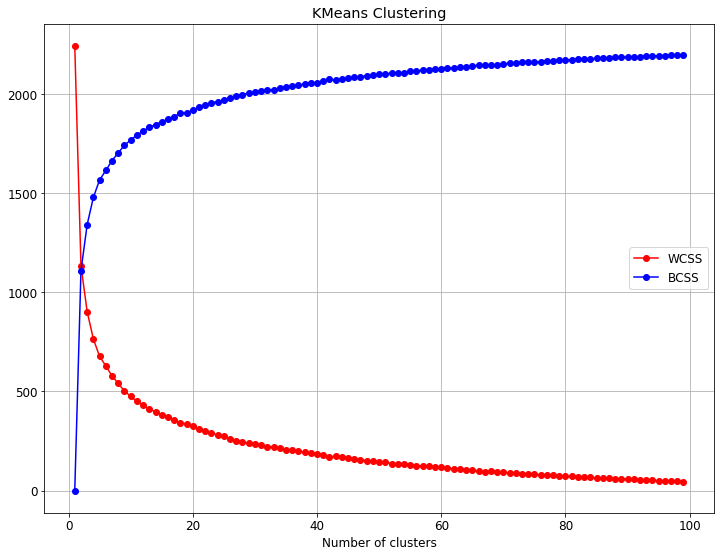

In [16]:
random_state = 1234
x = zs[['mean_r', 'mean_g', 'mean_b', 'median_r','median_g', 'median_b', 'rms_r', 'rms_g', 'rms_b', 'stddev_r','stddev_g', 'stddev_b']].values
KneeElbowAnalysis(x,max_k=100)

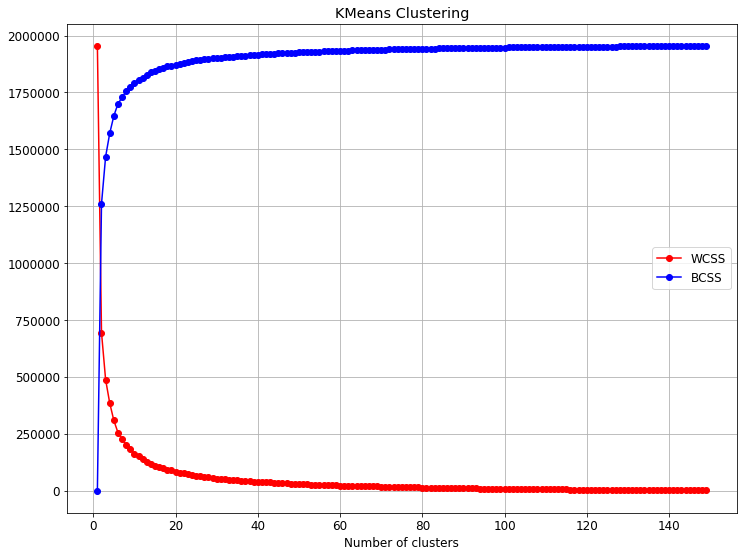

In [17]:
random_state = 2379128371
x = df[['median_r','median_g', 'median_b']].values
KneeElbowAnalysis(x,max_k=150)